In [1]:
import tensorflow as tf
import numpy as np
import math
na = np.newaxis
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# import helper functions from utils.py:
from utils import tf_tril_indices, load_lookup_table, table_lookup_op_parallel, get_scp_samples, train_parameters, evaluation

In [2]:
disasters_array = np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [5]:
data_samples = np.array([])
tmp = [(i+np.linspace(0,1,disasters_array[i]+2)[1:-1]) for i in np.arange(disasters_array.shape[0])]

for j in np.arange(len(tmp)):
    data_samples = np.append(data_samples, tmp[j])


In [9]:
Tlims = np.array([[5, 110]])
m_val,S_val,Kzz_inv,alphas_vals,Z,g_val = train_parameters(np.expand_dims(data_samples,1), 10, Tlims,
                                                           optimize_inducing_points = False, 
                                                           train_hyperparameters = True, 
                                                           learning_rate=0.0001, 
                                                           max_iterations = 2000, 
                                                           gamma_init = 0.5, 
                                                           alphas_init = 100, 
                                                           log_dir=None, 
                                                           run_prefix=None)

Begin training
Fixed inducing points on a grid
Z.shape: (10, 1)


[ 100.01226044] 0.822724 [ 2.32327604  1.65691543  1.94669831  1.22354555  1.00004923  0.91802049
  0.79464823  1.38271964  0.69279677  0.57149529]


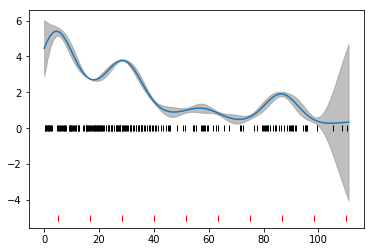

In [8]:
eval_points = np.expand_dims(np.linspace(0, 111, 100),axis=1)

print(alphas_vals, g_val,m_val)
lam, lam_var = evaluation(m_val,S_val,Kzz_inv,alphas_vals,g_val,Z,eval_points)

var1 = lam+lam_var*10
var2 = lam-lam_var*10
plt.plot(eval_points,lam)
plt.plot(data_samples,np.zeros(data_samples.shape[0]),'k|')
plt.fill_between(eval_points[:,0], var1, var2, color='grey', alpha='0.5')
plt.plot(Z,np.zeros(Z.shape[0])-5,'r|')
plt.show()